In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']

In [3]:
train_df = pd.read_csv("/media/ayse/ML/ML/train.csv")
test_df = pd.read_csv("~/Desktop/smallData/validate.csv")

train_df.head()


,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [4]:
print('Train has {:,} rows and Test has {:,} rows.'.format(len(train_df), len(test_df)))

Train has 33,126 rows and Test has 28 rows.


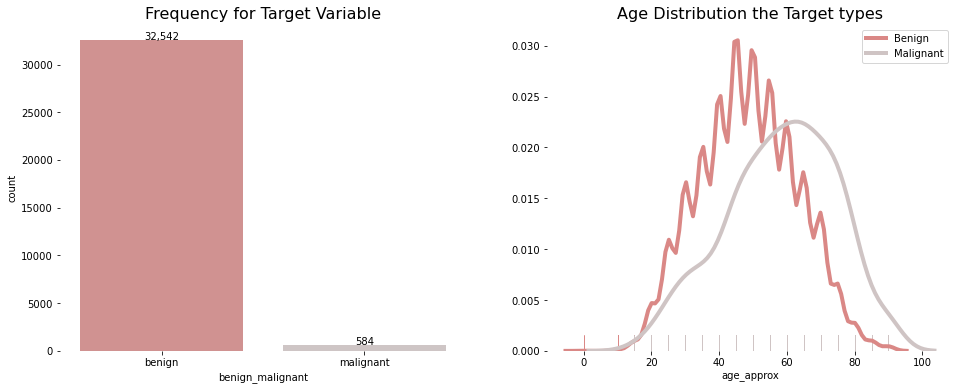

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(data = train_df, x = 'benign_malignant', palette=colors_nude[2:4],
                 ax=ax1)
b = sns.distplot(a = train_df[train_df['target']==0]['age_approx'], ax=ax2, color=colors_nude[2], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Benign')
c = sns.distplot(a = train_df[train_df['target']==1]['age_approx'], ax=ax2, color=colors_nude[3], 
                 hist=False, rug=True, kde_kws=dict(linewidth=4), label='Malignant')

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
ax1.set_title('Frequency for Target Variable', fontsize=16)
ax2.set_title('Age Distribution the Target types', fontsize=16)
sns.despine(left=True, bottom=True);


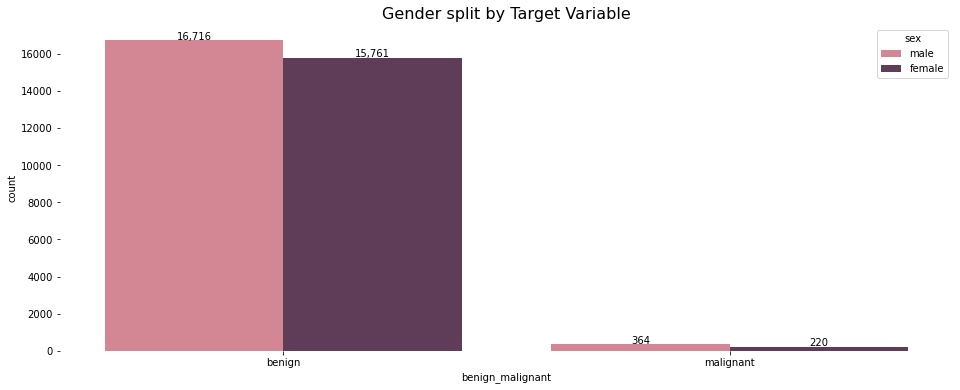

In [6]:
plt.figure(figsize=(16, 6))
a = sns.countplot(data=train_df, x='benign_malignant', hue='sex', palette=colors_nude)

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')

plt.title('Gender split by Target Variable', fontsize=16)
sns.despine(left=True, bottom=True);

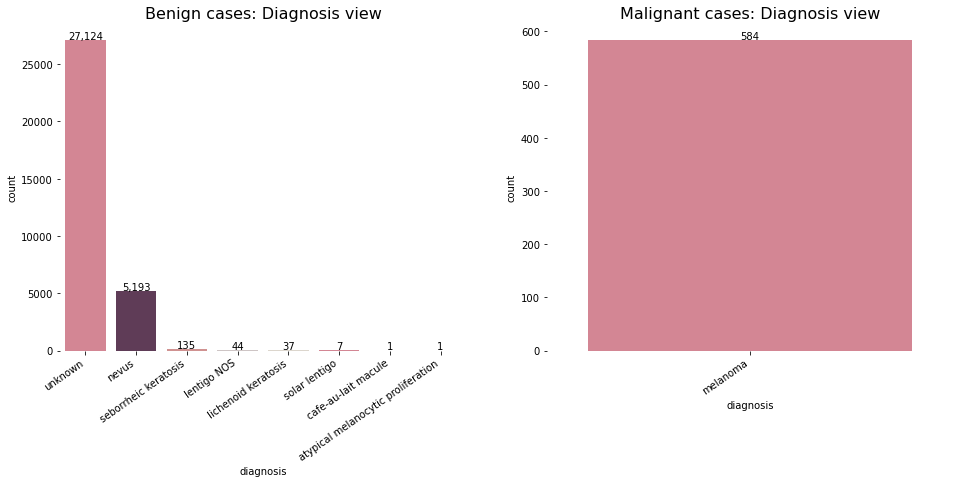

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(train_df[train_df['target']==0]['diagnosis'], ax=ax1, palette = colors_nude)
b = sns.countplot(train_df[train_df['target']==1]['diagnosis'], ax=ax2, palette = colors_nude)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")

for p in a.patches:
    a.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
for p in b.patches:
    b.annotate(format(p.get_height(), ','), 
           (p.get_x() + p.get_width() / 2., 
            p.get_height()), ha = 'center', va = 'center', 
           xytext = (0, 4), textcoords = 'offset points')
    
ax1.set_title('Benign cases: Diagnosis view', fontsize=16)
ax2.set_title('Malignant cases: Diagnosis view', fontsize=16)
sns.despine(left=True, bottom=True);

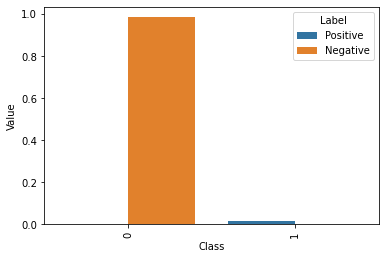

In [14]:
data = pd.DataFrame({"Class": 1, "Label": "Positive", "Value": freq_pos}, index=[0])
data = data.append({"Class": 0, "Label": "Negative", "Value": freq_neg }, ignore_index=True)
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label" ,data=data)

In [15]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights 
neg_contribution = freq_neg * neg_weights

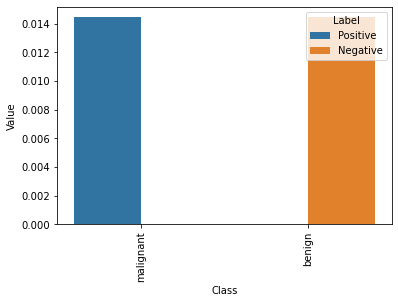

In [16]:
data = pd.DataFrame({"Class": "malignant", "Label": "Positive", "Value": pos_contribution}, index=[0])
data = data.append({"Class": "benign", "Label": "Negative", "Value": neg_contribution} , ignore_index=True)
plt.xticks(rotation=90)
sns.barplot(x="Class", y="Value", hue="Label" ,data=data);